Dados originais (cabeçalho):
        Tempo Temperatura Umidade  Vento Sair_Caminhar
0  Ensolarado      Quente    Alta  Fraco           Nao
1  Ensolarado      Quente    Alta  Forte           Nao
2     Nublado      Quente    Alta  Fraco           Sim
3     Chuvoso   Agradavel    Alta  Fraco           Sim
4     Chuvoso        Fria  Normal  Fraco           Sim
Total de linhas nos dados: 20


Dados após codificação numérica (cabeçalho):
   Tempo  Temperatura  Umidade  Vento  Sair_Caminhar
0      1            2        0      1              0
1      1            2        0      0              0
2      2            2        0      1              1
3      0            0        0      1              1
4      0            1        1      1              1


Modelo de Árvore de Decisão treinado com sucesso!


Acurácia do modelo (proporção de acertos): 0.95




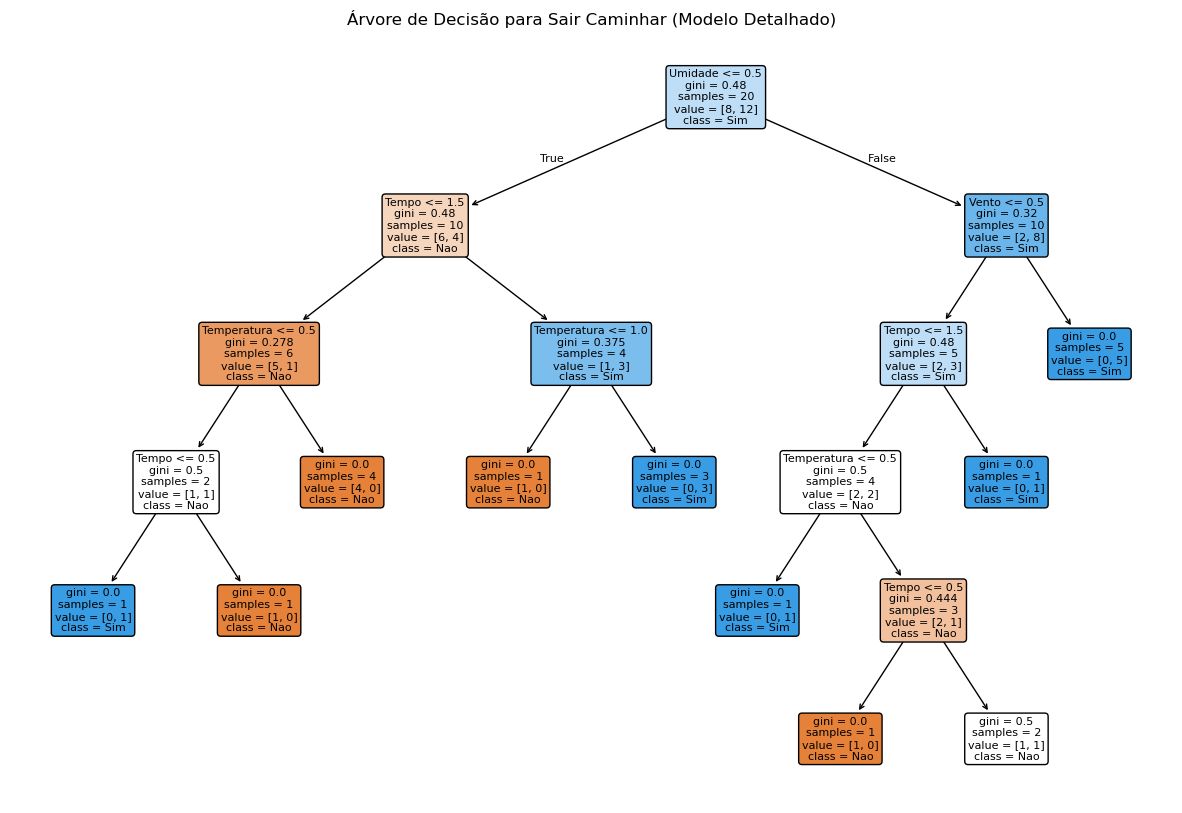

Árvore de Decisão visualizada com matplotlib e plot_tree.
Uma janela pop-up com a árvore deve ter aparecido.


Previsão para Tempo=Nublado, Temperatura=Agradavel, Umidade=Normal, Vento=Fraco: Sim


In [1]:
import pandas as pd # Importa a biblioteca Pandas para manipulação de DataFrames (tabelas de dados)
from sklearn.tree import DecisionTreeClassifier, plot_tree # Importa o algoritmo de Árvore de Decisão e a função para visualizá-lo
from sklearn.preprocessing import LabelEncoder # Importa o codificador para transformar texto em números
from sklearn.metrics import accuracy_score # Importa a função para calcular a acurácia do modelo
import matplotlib.pyplot as plt # Importa Matplotlib para criar gráficos (usado para exibir a árvore)

# 1. Preparação dos Dados
# Cria um dicionário com os dados de exemplo. Cada chave é uma coluna, e a lista são os valores.
data = {
    'Tempo': [
        'Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso', 'Chuvoso', 'Chuvoso', 'Nublado', 'Ensolarado', 'Ensolarado', 'Chuvoso',
        'Nublado', 'Chuvoso', 'Ensolarado', 'Nublado', 'Chuvoso', 'Ensolarado', 'Nublado', 'Chuvoso', 'Ensolarado', 'Ensolarado'
    ],
    'Temperatura': [
        'Quente', 'Quente', 'Quente', 'Agradavel', 'Fria', 'Fria', 'Fria', 'Agradavel', 'Fria', 'Agradavel',
        'Quente', 'Agradavel', 'Fria', 'Quente', 'Fria', 'Agradavel', 'Agradavel', 'Agradavel', 'Quente', 'Fria'
    ],
    'Umidade': [
        'Alta', 'Alta', 'Alta', 'Alta', 'Normal', 'Normal', 'Normal', 'Alta', 'Normal', 'Normal',
        'Alta', 'Normal', 'Normal', 'Alta', 'Alta', 'Normal', 'Alta', 'Normal', 'Alta', 'Normal'
    ],
    'Vento': [
        'Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Forte', 'Fraco', 'Fraco', 'Forte',
        'Fraco', 'Fraco', 'Forte', 'Forte', 'Fraco', 'Fraco', 'Forte', 'Fraco', 'Forte', 'Forte'
    ],
    'Sair_Caminhar': [
        'Nao', 'Nao', 'Sim', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Sim',
        'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim'
    ]
}
df = pd.DataFrame(data) # Converte o dicionário para um DataFrame do Pandas (formato de tabela).

print("Dados originais (cabeçalho):")
print(df.head()) # Mostra as primeiras 5 linhas dos dados originais.
print(f"Total de linhas nos dados: {len(df)}") # Exibe o número total de exemplos.
print("\n" + "="*30 + "\n")

# Codifica as variáveis de texto em números.
le = LabelEncoder() # Cria uma instância do codificador.
# Itera sobre cada coluna que contém texto e a transforma em números.
# Ex: 'Ensolarado' -> 0, 'Nublado' -> 1, 'Chuvoso' -> 2 (a ordem depende da ocorrência ou ordem alfabética).
for column in ['Tempo', 'Temperatura', 'Umidade', 'Vento', 'Sair_Caminhar']:
    df[column] = le.fit_transform(df[column])

print("Dados após codificação numérica (cabeçalho):")
print(df.head()) # Mostra as primeiras 5 linhas dos dados já codificados.
print("\n" + "="*30 + "\n")

# Define as características (features) e o alvo (target).
X = df[['Tempo', 'Temperatura', 'Umidade', 'Vento']] # As colunas que serão usadas para prever.
y = df['Sair_Caminhar'] # A coluna que queremos prever ('Sim' ou 'Não').

feature_names = X.columns.tolist() # Obtém os nomes das colunas de características.
class_names = ['Nao', 'Sim'] # Define os nomes das classes de saída para a visualização (0='Nao', 1='Sim').

# 2. Divisão dos Dados (simplificada)
# Para este exemplo, usamos os mesmos dados para treinar e testar, simplificando.
# Em projetos reais, os dados seriam divididos em conjuntos de treino e teste separados.
X_train, X_test, y_train, y_test = X, X, y, y

# 3. Criação e Treinamento do Modelo
model = DecisionTreeClassifier(random_state=42, min_samples_leaf=1) # Cria o modelo de Árvore de Decisão.
# random_state=42: Garante que a árvore seja a mesma toda vez que o código rodar.
# min_samples_leaf=1: Permite que os nós folha (decisões finais) contenham apenas 1 amostra.
model.fit(X_train, y_train) # Treina o modelo usando os dados de treinamento (X_train, y_train).

print("Modelo de Árvore de Decisão treinado com sucesso!")
print("\n" + "="*30 + "\n")

# 4. Avaliação do Modelo
y_pred = model.predict(X_test) # Faz previsões nos dados de 'teste' usando o modelo treinado.
accuracy = accuracy_score(y_test, y_pred) # Calcula a acurácia (percentual de previsões corretas).
print(f"Acurácia do modelo (proporção de acertos): {accuracy:.2f}") # Exibe a acurácia.
print("\n" + "="*30 + "\n")

# 5. Visualização da Árvore de Decisão
plt.figure(figsize=(15, 10)) # Define o tamanho da figura onde a árvore será desenhada.
plot_tree(model,
          feature_names=feature_names, # Define os nomes das características para os nós.
          class_names=class_names, # Define os nomes das classes para os nós folha.
          filled=True,      # Preenche os nós com cores, indicando a classe predominante.
          rounded=True,     # Desenha os nós com bordas arredondadas.
          fontsize=8)       # Define o tamanho da fonte dentro dos nós para melhor legibilidade.
plt.title("Árvore de Decisão para Sair Caminhar (Modelo Detalhado)") # Adiciona um título ao gráfico.
plt.show() # Exibe a janela com a visualização da árvore.

print("Árvore de Decisão visualizada com matplotlib e plot_tree.")
print("Uma janela pop-up com a árvore deve ter aparecido.")
print("\n" + "="*30 + "\n")

# 6. Exemplo de Previsão para um Novo Ponto de Dados
# Cria um novo dado de entrada para o qual queremos uma previsão.
# Os valores numéricos devem corresponder à codificação feita anteriormente.
# Exemplo: Nublado (2), Agradavel (0), Normal (1), Fraco (0).
novo_dado = pd.DataFrame([[2, 0, 1, 0]], columns=feature_names) # Cria um DataFrame com o novo dado.
predicao_numerica = model.predict(novo_dado) # O modelo prevê a classe para o novo dado.

# Converte o resultado numérico da previsão de volta para texto ('Sim' ou 'Nao').
predicao_texto = "Sim" if predicao_numerica[0] == 1 else "Nao"

print(f"Previsão para Tempo=Nublado, Temperatura=Agradavel, Umidade=Normal, Vento=Fraco: {predicao_texto}")